In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Country Data

In [7]:
# Read the country data
country_df = pd.read_csv('Resources/result_files/step2_reformat_data_for_analysis.csv')

# Display country data
country_df.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year
0,3/31/01,78400.0,20010331,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
1,6/30/01,73000.0,20010630,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
2,9/30/01,71500.0,20010930,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
3,12/31/01,38200.0,20011231,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
4,3/31/01,142.4,20010331,Albania,Lek,Albania,ALB,8.293313,2001


In [8]:
# Select South Africa 
south_africa_df = country_df.loc[country_df['Country Code'] == 'ZAF']

south_africa_df.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year
519,3/31/01,7.677,20010331,South Africa,Rand,South Africa,ZAF,2.700000,2001
520,6/30/01,7.995,20010630,South Africa,Rand,South Africa,ZAF,2.700000,2001
521,9/30/01,8.434,20010930,South Africa,Rand,South Africa,ZAF,2.700000,2001
522,12/31/01,11.990,20011231,South Africa,Rand,South Africa,ZAF,2.700000,2001
1131,3/31/02,11.337,20020331,South Africa,Rand,South Africa,ZAF,3.700374,2002


<Axes: title={'center': 'GDP Growth vs. Exchange Rate'}, xlabel='Exchange Rate', ylabel='GDPGrowth'>

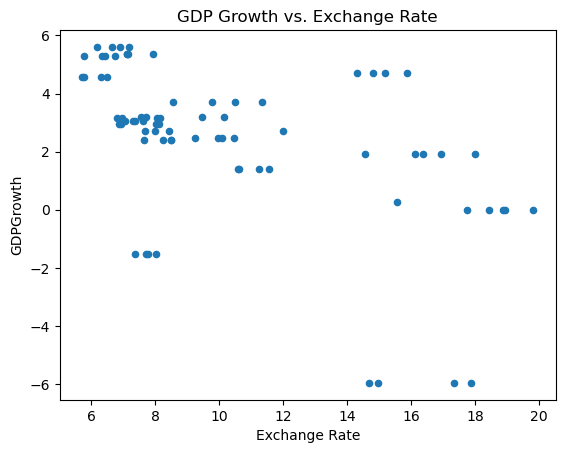

In [ ]:
# Create a scatter plot with the GDP Growth data 
country_plot = south_africa_df.plot.scatter(
    x="Exchange Rate",
    y="GDPGrowth",
    title="GDP Growth by Exchange Rate",
)
country_plot

## Prepare the Data to Fit the Linear Regression Model

In [29]:
# Use the 'reshape' function to reshape the X set as a single column array
X = south_africa_df["Exchange Rate"].values.reshape(-1, 1)

# Display the array data
X[:5]

array([[ 7.677],
       [ 7.995],
       [ 8.434],
       [11.99 ],
       [11.337]])

In [30]:
# Create an array for the dependent variable y with the sales data
y = south_africa_df["GDPGrowth"]

## Build the Linear Regression Model

In [31]:
# Create a model with scikit-learn
model = LinearRegression()

In [32]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [33]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [-0.35574623]


In [34]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 6.080496428492319


In [35]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 6.080496428492319 + -0.35574622502927X


## Plot the Best Fit Line for the GDP Growth Prediction Model

In [38]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [41]:
# Create a copy of the original data
sa_gdpg_predicted = south_africa_df.copy()

# Add a column with the predicted gdp values
sa_gdpg_predicted["gdpg_predicted"] = predicted_y_values

# Display sample data
sa_gdpg_predicted.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year,gdpg_predicted
519,3/31/01,7.677,20010331,South Africa,Rand,South Africa,ZAF,2.700000,2001,3.349433
520,6/30/01,7.995,20010630,South Africa,Rand,South Africa,ZAF,2.700000,2001,3.236305
521,9/30/01,8.434,20010930,South Africa,Rand,South Africa,ZAF,2.700000,2001,3.080133
522,12/31/01,11.990,20011231,South Africa,Rand,South Africa,ZAF,2.700000,2001,1.815099
1131,3/31/02,11.337,20020331,South Africa,Rand,South Africa,ZAF,3.700374,2002,2.047401


<Axes: xlabel='Exchange Rate'>

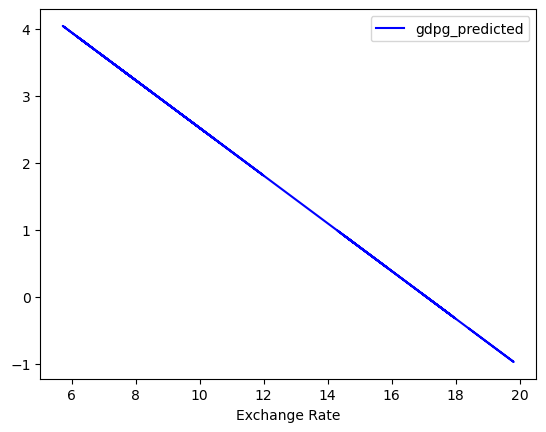

In [43]:
# Create a line plot of the predicted GDP Growth values
best_fit_line = sa_gdpg_predicted.plot.line(
    x = "Exchange Rate",
    y = "gdpg_predicted",
    color = "blue"
)
best_fit_line

<Axes: title={'center': 'GDP Growth and Exchange Rate'}, xlabel='Exchange Rate', ylabel='GDPGrowth'>

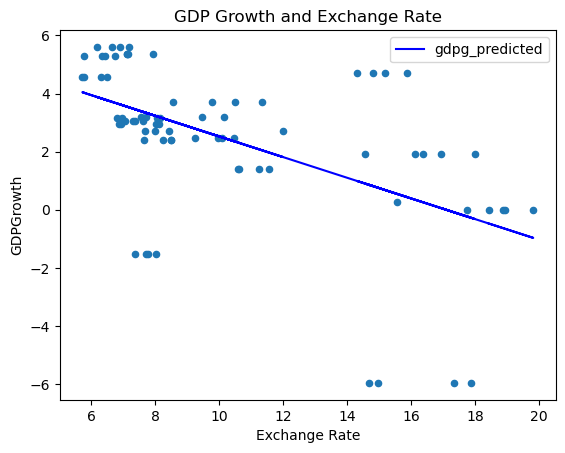

In [46]:
# Superpose the original data and the best fit line
# Create a scatter plot with the gdp growth information
gdpg_plot = sa_gdpg_predicted.plot.scatter(
    x="Exchange Rate",
    y="GDPGrowth",
    title="GDP Growth and Exchange Rate",
)

best_fit_line = sa_gdpg_predicted.plot.line(
    x = "Exchange Rate",
    y = "gdpg_predicted",
    color = "blue",
    ax=gdpg_plot
)
gdpg_plot

## Manual Predictions

In [49]:
# Formula to predict the GDP Growth on a given date
# At close on May 31, 2024 the USD/ZAR = 18.7063
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 18.7063")

# Predict the GDP Growth on May 31, 2024 Close
may_31_2024 = model.intercept_ + model.coef_[0] * 18.7063

# Display the prediction
print(f"Predicted GDP Growth on May 31, 2024: {may_31_2024:.2f}")

Model's formula: y = 6.080496428492319 + -0.35574622502927 * 18.7063
Predicted GDP Growth on May 31, 2024: -0.57


## Make Predictions Using the `predict` Function

In [50]:
# Array to predict GDP Growth when South African Rand is at 19, 20, 21, 22, and 23 to the USD.
X_exc = np.array([19, 20, 21, 22, 23])

# Format the array as a one-column array
X_exc = X_exc.reshape(-1,1)

# Display sample data
X_exc

array([[19],
       [20],
       [21],
       [22],
       [23]])

In [58]:
# Predict GDP Growth for 19, 20, 21, 22, and 23 Rand to the USD.
predicted_gdpg = model.predict(X_exc)

In [59]:
# Create a DataFrame for the predicted GDP Growhth values
df_predicted_gdpg = pd.DataFrame(
    {
        "Exchange Rate": X_exc.reshape(1, -1)[0],
        "predicted_gdpg": predicted_gdpg
    }
)

# Display data
df_predicted_gdpg

,Exchange Rate,predicted_gdpg
0,19,-0.678682
1,20,-1.034428
2,21,-1.390174
3,22,-1.745921
4,23,-2.101667
